<a href="https://colab.research.google.com/github/BeverlyHuang/new_market_analysis/blob/master/New_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Market Analysis

## Business Understanding
As an on-demand delivery platform connecting “Jumpmen” and customers purchasing a variety of goods, Jumpman23 is growing fast and has just launched in its newest market in New York City. This project will explore the delivery data to understand the market condition in New York City and extract insights for business action.


## Data Preparation

### Import Packages

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [0]:
data = pd.read_csv("analyze_me.csv")
data.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [0]:
data[data['customer_id']==64452]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
539,1412262,64452,113804,truck,Momofuku Milk Bar,Dessert,Corn Cookie,2.0,Cookies,NaN,40.787150,-73.971722,40.784885,-73.953505,2014-10-20 22:41:48.533352,2014-10-20 22:46:16.817416,2014-10-20 23:03:03.967405,2014-10-20 23:14:13.281667
2286,1448482,64452,174416,walker,Il Laboratorio Del Gelato,NaN,NaN,NaN,NaN,NaN,40.722501,-73.987126,40.722158,-73.985364,2014-10-25 16:35:06.108593,NaN,NaN,2014-10-25 17:04:47.543452


### Data Integrity: Check Duplicates

#### How many duplicated delivery_id? 

In [0]:
len(data)

5983

In [0]:
len(data.delivery_id.unique())

5214

In [0]:
data[data.duplicated(['delivery_id'])]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
82,1314550,348787,119813,bicycle,Otto Enoteca Pizzeria,Italian,Prosciutto Arugula,1.0,Pizzas,00:22:42.942105,40.732064,-73.996155,40.767582,-73.983704,2014-10-07 18:40:38.769589,2014-10-07 18:49:49.978276,2014-10-07 19:27:58.470009,2014-10-07 19:55:56.804909
207,1332526,48677,152676,bicycle,Shake Shack,Burger,Smoke Shack,1.0,Burgers,NaN,40.715279,-74.014860,40.724520,-73.993420,2014-10-10 18:41:05.90546,2014-10-10 19:04:31.649579,2014-10-10 19:46:22.211936,2014-10-10 20:15:31.476676
244,1319971,94027,119255,walker,Trader Joe's,Grocery Store,Organic Autumn Wheat,1.0,Breakfast & Cereal,NaN,40.741740,-73.993650,40.736971,-73.985844,2014-10-08 19:33:52.549234,2014-10-08 19:45:18.293971,2014-10-08 20:38:07.37508,2014-10-08 20:49:29.420191
285,1350002,120385,22502,bicycle,Westville Hudson,American,Grilled Marinated Chicken Breast,1.0,Plates,00:05:48.115407,40.727031,-74.007511,40.721293,-73.994055,2014-10-12 20:14:32.904623,2014-10-12 20:29:05.838878,2014-10-12 20:40:41.640077,2014-10-12 20:49:33.374863
531,1439953,385150,32580,bicycle,Blue Ribbon Sushi,Japanese,Ebi Shumai,1.0,Appetizers,00:06:36.262226,40.726110,-74.002492,40.781068,-73.951913,2014-10-24 19:14:17.583366,2014-10-24 19:41:08.487768,2014-10-24 20:00:43.442688,2014-10-24 20:25:14.561916
595,1480991,94480,30774,bicycle,TAO,Japanese,Unagi,1.0,Sushi & Sashimi,00:09:58.807439,40.762858,-73.971619,40.773538,-73.962198,2014-10-29 18:31:41.010557,2014-10-29 18:53:32.723392,2014-10-29 19:05:24.04317,2014-10-29 19:15:33.218875
659,1386459,331143,104533,bicycle,Waverly Diner,American,Lox & Onions Omelette,2.0,Combination Omelettes,00:06:38.149181,40.733012,-74.000056,40.732486,-73.996585,2014-10-18 01:14:29.788413,2014-10-18 01:36:13.076958,2014-10-18 01:52:07.753398,2014-10-18 01:55:43.310235
684,1343610,83287,53095,bicycle,Blue Ribbon Sushi Izakaya,Japanese,Beef Short Rib & Garlic,1.0,Kushi Yaki (Skewers),00:05:38.163633,40.721980,-73.988148,40.742308,-73.982041,2014-10-12 01:15:42.778777,2014-10-12 01:22:47.552161,2014-10-12 01:33:37.655219,2014-10-12 02:01:28.995306
701,1481173,386678,118095,bicycle,Trader Joe's,Grocery Store,Bolognese Pasta Sauce,1.0,"Grains, Pasta & Sides",NaN,40.733634,-73.987769,40.714762,-74.007023,2014-10-29 18:52:28.456245,2014-10-29 19:27:13.206347,2014-10-29 20:15:27.234338,2014-10-29 20:37:09.97112
729,1375856,105385,133293,bicycle,Han Dynasty,Chinese,Scallion Pancake,1.0,Kids/Baby Adults,NaN,40.732213,-73.988072,40.711816,-73.992565,2014-10-16 20:14:13.051401,2014-10-16 20:35:47.106911,2014-10-16 20:56:07.126601,2014-10-16 21:08:52.643082


#### Why duplicate?
Examine one duplicate delivery_id, I find that it is because one delivery_id has multiple items.

In [0]:
data[data['delivery_id']==1314550]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
35,1314550,348787,119813,bicycle,Otto Enoteca Pizzeria,Italian,Lentils “Toscana”,1.0,Vegetables,00:22:42.942105,40.732064,-73.996155,40.767582,-73.983704,2014-10-07 18:40:38.769589,2014-10-07 18:49:49.978276,2014-10-07 19:27:58.470009,2014-10-07 19:55:56.804909
82,1314550,348787,119813,bicycle,Otto Enoteca Pizzeria,Italian,Prosciutto Arugula,1.0,Pizzas,00:22:42.942105,40.732064,-73.996155,40.767582,-73.983704,2014-10-07 18:40:38.769589,2014-10-07 18:49:49.978276,2014-10-07 19:27:58.470009,2014-10-07 19:55:56.804909


#### Is there any duplicate after considering item_name?
There are still many duplicates with the same delivery_id and item_name.

In [0]:
data[data.duplicated(['delivery_id','item_name'])]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
742,1319722,149234,139558,bicycle,Maimonide of Brooklyn,Vegetarian,Mob Cheeseburger Deluxe,1.0,Entrees,00:06:23.989003,40.685201,-73.980211,40.649574,-73.964392,2014-10-08 18:57:37.700626,2014-10-08 19:08:42.938479,2014-10-08 19:19:32.491047,2014-10-08 19:37:39.504423
1988,1491424,391367,172130,walker,Veselka,Russian,Small Plate of Pierogis,1.0,Handmade Varenyky (Pierogi),00:07:29.766955,40.729136,-73.986972,40.723531,-73.982324,2014-10-30 23:08:43.4819,2014-10-30 23:10:31.062088,2014-10-30 23:23:51.143279,2014-10-30 23:29:44.866438
2302,1274791,59749,61162,bicycle,Bareburger,Burger,Barest Burger,1.0,Bareburgers,00:04:00.459294,40.768489,-73.955182,40.784797,-73.953658,2014-10-01 19:06:44.910149,2014-10-01 19:31:56.005935,2014-10-01 19:37:43.279843,2014-10-01 19:51:34.16288
2638,1423447,391860,167596,bicycle,Lucky's Famous Burgers,Burger,Lucky Shake,1.0,Shakes,00:10:07.572874,40.723331,-73.989531,40.720472,-73.989326,2014-10-22 19:24:39.796568,2014-10-22 19:56:48.461423,2014-10-22 20:03:04.956034,2014-10-22 20:06:06.979942
2681,1307411,364749,74692,bicycle,$10 Blue Ribbon Fried Chicken Sandwich,NaN,$10 Dirty Bird Rotisserie Chicken Wrap,1.0,Today's Special,NaN,40.724340,-73.990960,40.730769,-73.991322,2014-10-06 11:39:49.512676,NaN,NaN,2014-10-06 12:07:38.738406
2868,1328983,222734,155234,bicycle,Shake Shack,Burger,Shake,1.0,Shakes,NaN,40.715279,-74.014860,40.706205,-74.008536,2014-10-10 11:48:59.440323,2014-10-10 12:13:22.458846,2014-10-10 13:07:22.121709,2014-10-10 13:22:25.419881
3070,1349702,42781,65763,bicycle,2nd Ave Deli,Deli,Potato Knish,2.0,Franks and Knishes,00:06:54.394431,40.745299,-73.979138,40.738913,-73.987760,2014-10-12 19:52:26.821498,2014-10-12 20:21:08.326255,2014-10-12 20:40:57.055153,2014-10-12 20:49:50.794829
3173,1280728,127149,57496,bicycle,P.J. Clarke's,American,Simply On A Bun,1.0,P.J. Clarke's Hamburgers,00:16:31.335223,40.758939,-73.968531,40.766654,-73.952847,2014-10-02 18:15:18.193256,2014-10-02 18:37:50.811107,2014-10-02 18:50:58.760766,2014-10-02 19:03:28.535636
3985,1365600,140521,43955,bicycle,sweetgreen,Salad,"Apples, Pears + Organic Cheddar",1.0,Signatures,00:09:09.00126,40.721323,-74.009732,40.724681,-73.995446,2014-10-15 11:18:23.525257,2014-10-15 11:51:07.914807,2014-10-15 12:04:27.991444,2014-10-15 12:15:00.350606
4069,1341790,373689,152676,bicycle,Bareburger,Burger,Country Bacon,1.0,Bareburgers,00:21:38.732788,40.768489,-73.955182,40.765698,-73.954975,2014-10-11 20:59:28.330299,2014-10-11 21:19:47.335511,2014-10-11 21:40:35.894558,2014-10-11 21:46:48.605621


#### Why duplicate?
Examine one duplicate delivery_id, I find that it is because item quantity is not combined.

In [0]:
data[data['delivery_id']==1319722]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
267,1319722,149234,139558,bicycle,Maimonide of Brooklyn,Vegetarian,Mob Cheeseburger Deluxe,1.0,Entrees,00:06:23.989003,40.685201,-73.980211,40.649574,-73.964392,2014-10-08 18:57:37.700626,2014-10-08 19:08:42.938479,2014-10-08 19:19:32.491047,2014-10-08 19:37:39.504423
742,1319722,149234,139558,bicycle,Maimonide of Brooklyn,Vegetarian,Mob Cheeseburger Deluxe,1.0,Entrees,00:06:23.989003,40.685201,-73.980211,40.649574,-73.964392,2014-10-08 18:57:37.700626,2014-10-08 19:08:42.938479,2014-10-08 19:19:32.491047,2014-10-08 19:37:39.504423
5827,1319722,149234,139558,bicycle,Maimonide of Brooklyn,Vegetarian,Iron Man MOB,1.0,MOBs,00:06:23.989003,40.685201,-73.980211,40.649574,-73.964392,2014-10-08 18:57:37.700626,2014-10-08 19:08:42.938479,2014-10-08 19:19:32.491047,2014-10-08 19:37:39.504423


#### Combine duplicated delivery 
Sum item_quantity of the same item in the delivery.

In [0]:
data['item_quantity'] = data.groupby(['delivery_id','item_name'])['item_quantity'].transform('sum')
df = data.drop_duplicates(subset=['delivery_id','item_name'])
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [0]:
df[df['delivery_id']==1319722]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
267,1319722,149234,139558,bicycle,Maimonide of Brooklyn,Vegetarian,Mob Cheeseburger Deluxe,2.0,Entrees,00:06:23.989003,40.685201,-73.980211,40.649574,-73.964392,2014-10-08 18:57:37.700626,2014-10-08 19:08:42.938479,2014-10-08 19:19:32.491047,2014-10-08 19:37:39.504423
5827,1319722,149234,139558,bicycle,Maimonide of Brooklyn,Vegetarian,Iron Man MOB,1.0,MOBs,00:06:23.989003,40.685201,-73.980211,40.649574,-73.964392,2014-10-08 18:57:37.700626,2014-10-08 19:08:42.938479,2014-10-08 19:19:32.491047,2014-10-08 19:37:39.504423


### Data Integrity: Check Missing Values

In [0]:
df.isna().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          882
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2938
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      548
when_the_Jumpman_left_pickup            548
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64

####  Handling Missing Value: Remove column that will not be used
Since 'how_long_it_took_to_order' has 2938 missing values out of 5963 data points, I remove it from the analysis.

In [0]:
df = df.drop(columns=['how_long_it_took_to_order'])
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


#### Handling Missing Value: Extract useful features
Extract duration from four time stamps.

In [0]:
start_time = pd.to_datetime(df['when_the_delivery_started'].astype(str)) 
arrived_pickup = pd.to_datetime(df['when_the_Jumpman_arrived_at_pickup'].astype(str)) 
left_pickup = pd.to_datetime(df['when_the_Jumpman_left_pickup'].astype(str))
dropoff_time = pd.to_datetime(df['when_the_Jumpman_arrived_at_dropoff'].astype(str))

df['Start_to_Pickup'] = arrived_pickup.sub(start_time).dt.total_seconds().div(60)
df['Pickup_Time'] = left_pickup.sub(arrived_pickup).dt.total_seconds().div(60)
df['Pickup_to_Dropoff'] = dropoff_time.sub(left_pickup).dt.total_seconds().div(60)
df['Start_to_Dropoff'] = dropoff_time.sub(start_time).dt.total_seconds().div(60)

df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,pickup_lat,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Start_to_Pickup,Pickup_Time,Pickup_to_Dropoff,Start_to_Dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,40.744607,...,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,NaN,NaN,NaN,60.106903
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,40.723080,...,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,27.057767,22.349505,10.997627,60.404899
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,40.728478,...,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,-2.564350,21.853190,5.510836,24.799676
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,40.738868,...,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,10.103795,12.335604,16.003237,38.442636
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),40.726110,...,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,7.404195,10.611635,23.129172,41.145002


The takeaway from the data integrity analysis is that the data collection in this new market was not standardized – data were not aggregated and many data were missing. Thus, more effort needs to be invested to improve the data collection on places, items ordered, and time when the Jumpman arrived at and left pickup locations.

# Data Exploration 

### Mega Data Overview

After data cleaning, I first looked at the mega data. During the month, there were 5214 deliveries on Jumpman23, with 578 Jumpmen connecting 898 merchants with 3192 customers. Thus, on average, there were 174 deliveries every day. Jumpman23 performed well generally in the new market.

In [0]:
len(df.delivery_id.unique())

5214

In [0]:
len(df.customer_id.unique())

3192

In [0]:
len(df.jumpman_id.unique())

578

In [0]:
df.vehicle_type.unique()

array(['van', 'bicycle', 'car', 'walker', 'truck', 'scooter',
       'motorcycle'], dtype=object)

In [0]:
len(df.pickup_place.unique())

898

In [0]:
len(df.place_category.unique())

58

In [0]:
len(df.item_name.unique())

2278

In [0]:
len(df.item_category_name.unique())

768

In [0]:
df.describe()

,delivery_id,customer_id,jumpman_id,item_quantity,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,Start_to_Pickup,Pickup_Time,Pickup_to_Dropoff,Start_to_Dropoff
count,5.963000e+03,5963.000000,5963.000000,4733.000000,5963.000000,5963.000000,5963.000000,5963.000000,5415.000000,5415.000000,5415.000000,5963.000000
mean,1.379565e+06,176374.924032,102652.327855,1.253539,40.741434,-73.987113,40.744238,-73.985770,12.687770,18.929742,14.142135,46.079608
std,6.456795e+04,116365.961215,48600.700549,0.792205,0.022833,0.014886,0.025233,0.018057,12.285729,12.451259,9.311259,20.235807
min,1.271706e+06,242.000000,3296.000000,1.000000,40.665611,-74.015837,40.649356,-74.017679,-2.651465,0.001877,0.839419,3.047181
25%,1.322798e+06,77793.000000,60761.000000,1.000000,40.724340,-73.996630,40.725307,-74.000297,3.590225,10.819968,7.997490,32.666752
50%,1.375765e+06,131093.000000,113364.000000,1.000000,40.735677,-73.988682,40.740424,-73.989307,9.967435,15.817395,11.768483,42.666265
75%,1.436446e+06,293232.000000,143807.000000,1.000000,40.758726,-73.980739,40.763885,-73.974722,18.859880,23.839043,17.405409,55.126968
max,1.491424e+06,405547.000000,181543.000000,16.000000,40.818082,-73.920980,40.848324,-73.924124,142.090125,267.954044,119.190060,340.308810


### 1. Geo Map of Pickup & Dropoff Points: Dropoff locations are more spread out than pickup locations

I further looked at all pickup and dropoff locations during the month. As shown below, dropoff locations were more spread out than pickup locations.

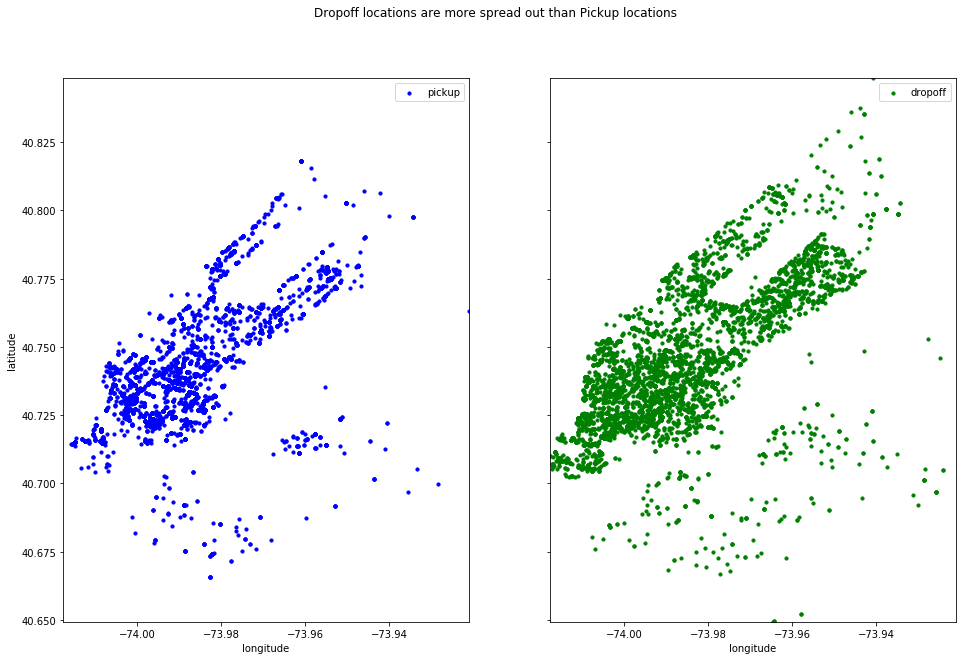

In [0]:
# set figure size
plt.rcParams['figure.figsize'] = [16, 10]

# set axis limit
city_long_border = (-74.017679, -73.920980)
city_lat_border = (40.649356, 40.848324)

# set figure layout
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

# plot scatterplot
ax[0].scatter(df['pickup_lon'].values, df['pickup_lat'].values,
              color='blue', s=10, label='pickup', alpha=1)
ax[1].scatter(df['dropoff_lon'].values, df['dropoff_lat'].values,
              color='green', s=10, label='dropoff', alpha=1)
fig.suptitle('Dropoff locations are more spread out than Pickup locations')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

### 2. Distribution of Delivery Time: Some deliveries took more than 80 minutes

Since this might pose challenges in delivery time, I looked at the distribution of delivery time. I broke down a delivery time into three parts – “Start_to_Pickup”, “Pickup_Time” and “Pickup_to_Dropoff”, and their total is “Start_to_Dropoff”. The distributions are shown below.
From the “Start_to_Dropoff” distribution, we can see most deliveries were completed within one hour. Compared with “Pickup_Time” and “Pickup_to_Dropoff”, “Start_to_Pickup” time was spread out wider, meaning that it took much time for the Jumpmen to arrive at the pickup points when a delivery order was placed. Thus, we need to dig into the reason behind and accelerate the order to pickup process.

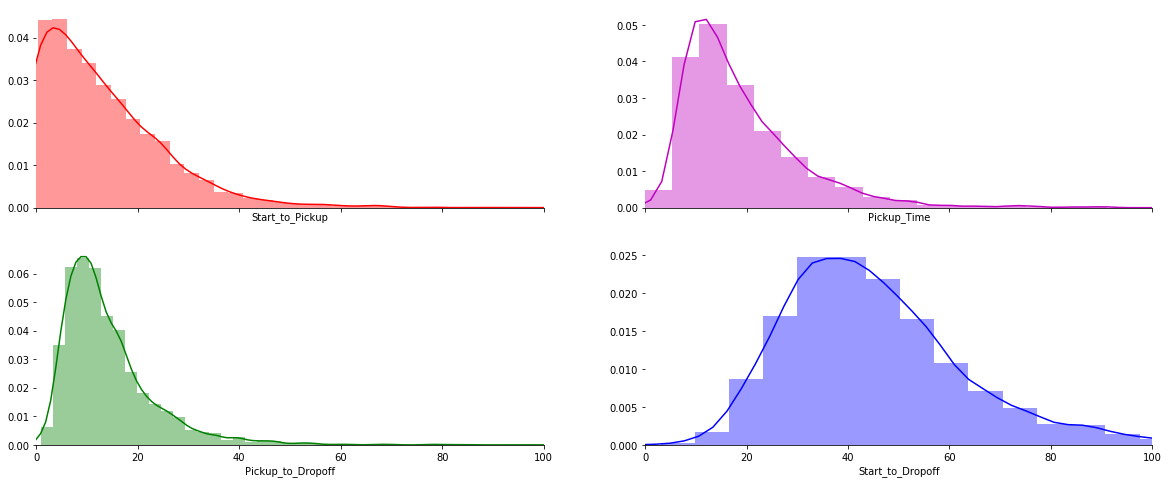

In [0]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(20, 8), sharex=True)

# Remove the top and right spines from plot
sns.despine(left=True)

# Set x_lim
axes[0,0].set_xlim(0,100)
axes[0,1].set_xlim(0,100)
axes[1,0].set_xlim(0,100)
axes[1,1].set_xlim(0,100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df.Start_to_Pickup.dropna(), color="r", ax=axes[0, 0])
sns.distplot(df.Pickup_Time.dropna(), color="m", ax=axes[0, 1])
sns.distplot(df.Pickup_to_Dropoff.dropna(), color="g", ax=axes[1, 0])
sns.distplot(df.Start_to_Dropoff, color="b", ax=axes[1, 1])

### 3. Long Delviery Time Exploration

To figure out why some deliveries took longer time, I took out those with total delivery time longer than 80 minutes and visualized them in the map below.

In [0]:
more_than_80 = df[df['Start_to_Dropoff']>80]
more_than_80.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,pickup_lat,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Start_to_Pickup,Pickup_Time,Pickup_to_Dropoff,Start_to_Dropoff
23,1370431,58898,142140,car,Whole Foods Market,Grocery Store,Org Tortilla Chips Blue Corn Lightly Salted,1.0,Tortilla Chips,40.723955,...,40.729954,-73.986350,2014-10-15 22:10:13.616511,NaN,NaN,2014-10-15 23:33:42.741134,NaN,NaN,NaN,83.485410
28,1315209,55478,118095,bicycle,Tevere 84,NaN,NaN,NaN,NaN,40.778035,...,40.732552,-73.996537,2014-10-07 20:18:32.473578,2014-10-07 20:57:05.453244,2014-10-07 21:27:38.071168,2014-10-07 22:22:01.7357,38.549661,30.543632,54.394409,123.487702
62,1339653,186478,144719,bicycle,Trader Joe's,Grocery Store,Tomato Pesto Flatbread,1.0,Frozen Foods,40.741740,...,40.737848,-74.003611,2014-10-11 16:53:28.189205,2014-10-11 17:01:32.038452,2014-10-11 18:24:54.405652,2014-10-11 18:32:46.031716,8.064154,83.372787,7.860434,99.297375
69,1366592,348130,102837,car,Whole Foods Market,Grocery Store,Iced Tea Peach Mango Zero Calorie,2.0,Teas & Drinks,40.723955,...,40.718683,-73.983136,2014-10-15 14:38:27.871059,2014-10-15 15:15:33.073426,2014-10-15 15:54:54.003297,2014-10-15 16:03:20.734445,37.086706,39.348831,8.445519,84.881056
70,1397309,103884,151208,bicycle,S'MAC,American,Buffalo Chicken,1.0,Sarita's Recommendation,40.730340,...,40.763171,-73.966359,2014-10-19 12:48:29.562173,2014-10-19 12:57:05.513242,2014-10-19 13:34:55.322798,2014-10-19 14:15:45.998306,8.599184,37.830159,40.844592,87.273936


#### Where are the deliveries that took a  long time ?

As clearly shown in the map above, pickup points are spread out. Thus, the long distance from pickup to dropoff locations might be one reason for the long delivery time.

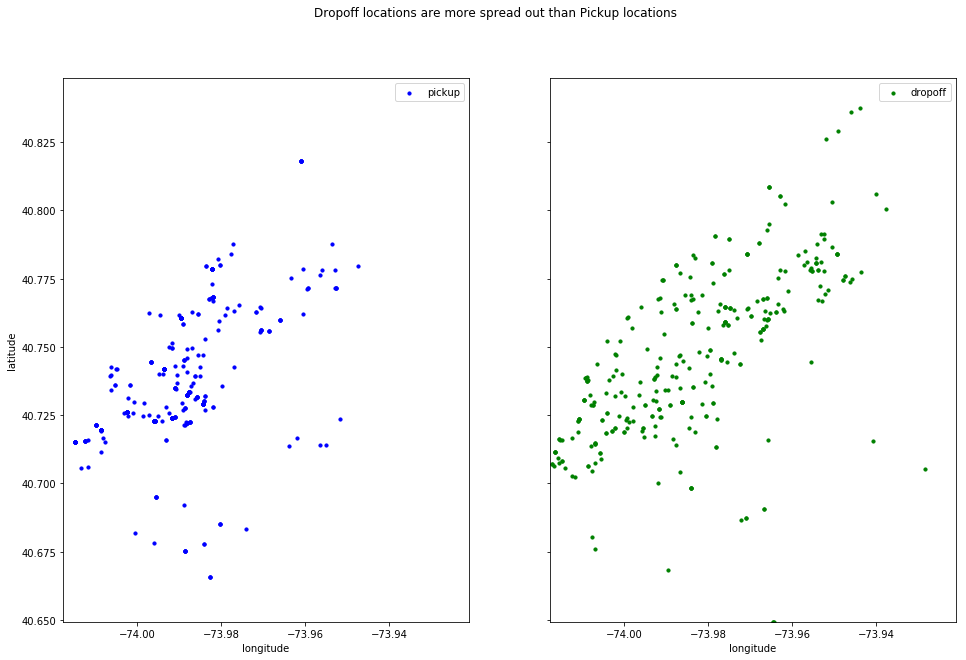

In [0]:
plt.rcParams['figure.figsize'] = [16, 10]

city_long_border = (-74.017679, -73.920980)
city_lat_border = (40.649356, 40.848324)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

ax[0].scatter(more_than_80['pickup_lon'].values, more_than_80['pickup_lat'].values,
              color='blue', s=10, label='pickup', alpha=1)
ax[1].scatter(more_than_80['dropoff_lon'].values, more_than_80['dropoff_lat'].values,
              color='green', s=10, label='dropoff', alpha=1)
fig.suptitle('Dropoff locations are more spread out than Pickup locations')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

####  Can we reduce the delivery time by using a different vehicle type?

If we use different vehicle types, can we reduce the delivery time? To explore that, I compared the average delivery time of different vehicle types on these long deliveries. Their differences were small, meaning that using different vehicles might not reduce delivery time.

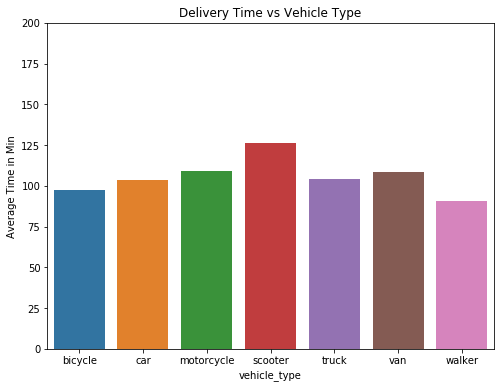

In [0]:
vehicle = more_than_80.groupby('vehicle_type')['Start_to_Dropoff'].mean()

plt.subplots(1,1,figsize=(8,6))
plt.ylim(ymin=0)
plt.ylim(ymax=200)
plt.title('Delivery Time vs Vehicle Type')
plt.ylabel('Average Time in Min')
sns.barplot(vehicle.index,vehicle.values)

#### Can we reduce delivery time from the merchant side?

Can we reduce delivery time from the merchant side? Let’s further explore the places of these long-time deliveries. I dropped missing values and used Word
Cloud to visualize all place names with long delivery time. As shown on the right, most of these orders were from Food Market, Whole Food and Trader Joe. Thus, one possible reason for long delivery time was because of the time spent on picking items the customers ordered.

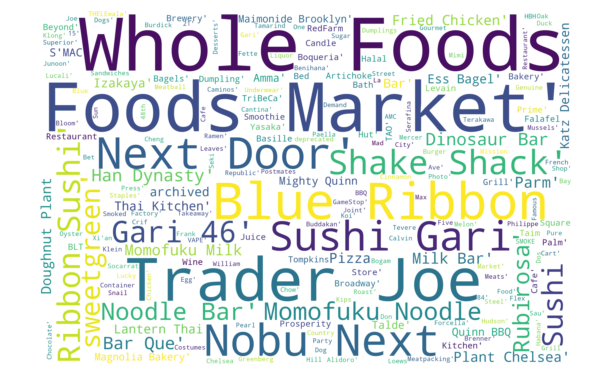

In [0]:
place = more_than_80['pickup_place'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(place))

fig = plt.figure(
    figsize = (8, 6),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

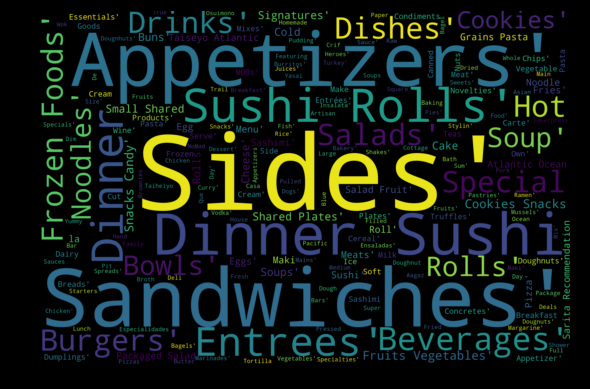

In [0]:
item_cat = more_than_80['item_category_name'].dropna().values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(item_cat))

fig = plt.figure(
    figsize = (8, 6),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 4. Time Patterns of Delivery Amount and Duration: Mismatch between Supply and Demand

Now, we know the long delivery time might be caused by the distance between pickup and dropoff locations and different processing time of merchants. Additionally, we want to look at the Jumpmen side and explore whether the long delivery time was caused by the mismatch between demand and supply of Jumpmen. To do that, I explored the time pattern of delivery amount and average delivery time during the month, during the week, and during the day.


In [0]:
df['when_the_delivery_started'] = pd.to_datetime(df.when_the_delivery_started)
df.loc[:, 'date'] = df['when_the_delivery_started'].dt.date

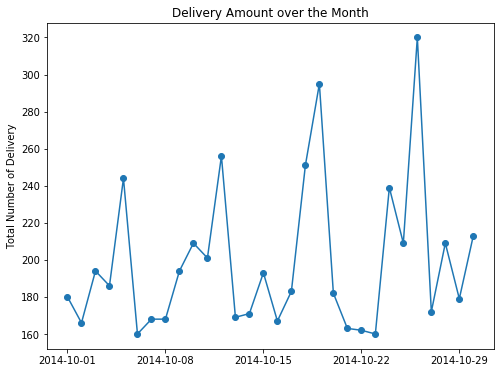

In [0]:
plt.subplots(1,1,figsize=(8,6))
plt.plot(df.groupby('date').count()[['delivery_id']], 'o-')
plt.title('Delivery Amount over the Month')
plt.ylabel('Total Number of Delivery')
plt.show()

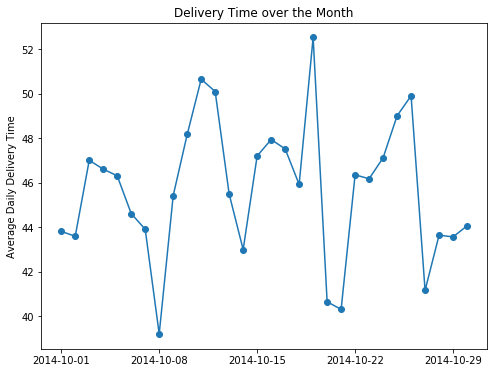

In [0]:
plt.subplots(1,1,figsize=(8,6))
plt.plot(df.groupby('date').mean()[['Start_to_Dropoff']], 'o-')
plt.title('Delivery Time over the Month')
plt.ylabel('Average Daily Delivery Time')
plt.show()

As shown below, demand was in an increasing trend but fluctuated during the month – highest on Sunday. Demand was at the peak during dinner time. Furthermore, for day of month and day of week, as the delivery amount increased, the average delivery time increased accordingly. It means that Jumpmen were not optimally allocated to handle peak demand. For hour of day, Jumpman23 handled peak hours well, but not for midnight orders.

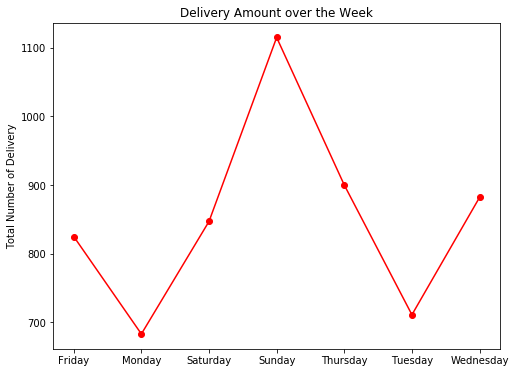

In [0]:
df['DayofWeek'] = df['when_the_delivery_started'].dt.day_name()
plt.subplots(1,1,figsize=(8,6))
plt.plot(df.groupby('DayofWeek').count()['delivery_id'], 'ro-')
plt.title('Delivery Amount over the Week')
plt.ylabel('Total Number of Delivery')
plt.show()

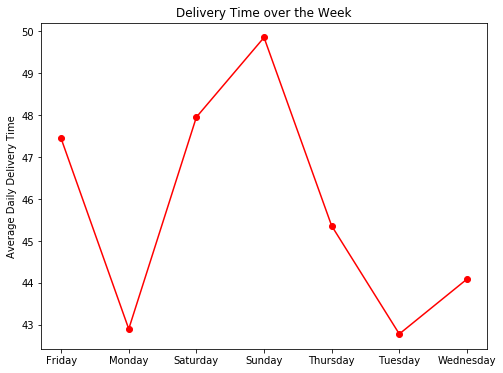

In [0]:
df['DayofWeek'] = df['when_the_delivery_started'].dt.day_name()
plt.subplots(1,1,figsize=(8,6))
plt.plot(df.groupby('DayofWeek').mean()[['Start_to_Dropoff']], 'ro-')
plt.title('Delivery Time over the Week')
plt.ylabel('Average Daily Delivery Time')
plt.show()

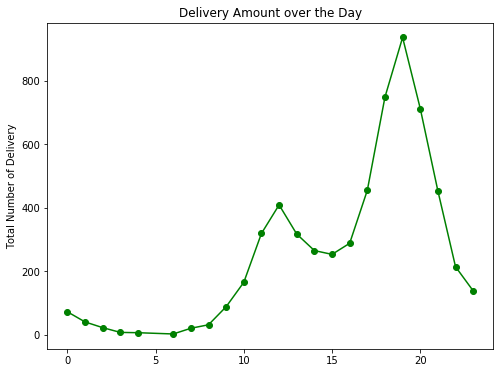

In [0]:
df['HourofDay'] = df['when_the_delivery_started'].dt.hour
plt.subplots(1,1,figsize=(8,6))
plt.plot(df.groupby('HourofDay').count()['delivery_id'], 'go-')
plt.title('Delivery Amount over the Day')
plt.ylabel('Total Number of Delivery')
plt.show()

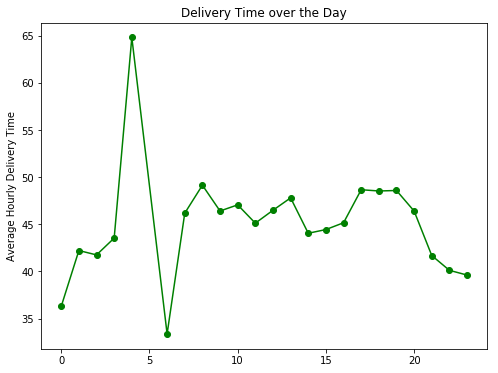

In [0]:
df['HourofDay'] = df['when_the_delivery_started'].dt.hour
plt.subplots(1,1,figsize=(8,6))
plt.plot(df.groupby('HourofDay').mean()[['Start_to_Dropoff']], 'go-')
plt.title('Delivery Time over the Day')
plt.ylabel('Average Hourly Delivery Time')
plt.show()

To summarize my findings, the long delivery time was caused by the distance between pickup and dropoff locations, different processing time of merchants, and the mismatch between demand and supply of Jumpmen during different days and time of the day.

## Solution: Monitoring Dashboard
I exported the transformed data to tableau and created a dashboard based on the exploration above.

In [0]:
df.to_csv("cleaned_data.csv")
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,pickup_lat,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,Start_to_Pickup,Pickup_Time,Pickup_to_Dropoff,Start_to_Dropoff,date,DayofWeek,HourofDay
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,40.744607,...,NaN,NaN,2014-10-26 14:52:06.313088,NaN,NaN,NaN,60.106903,2014-10-26,Sunday,13
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,40.723080,...,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,27.057767,22.349505,10.997627,60.404899,2014-10-16,Thursday,21
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,40.728478,...,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,-2.564350,21.853190,5.510836,24.799676,2014-10-28,Tuesday,21
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,40.738868,...,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,10.103795,12.335604,16.003237,38.442636,2014-10-30,Thursday,10
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),40.726110,...,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,7.404195,10.611635,23.129172,41.145002,2014-10-10,Friday,0


To solve the problem, I proposed building a dashboard to monitor the real-time market condition. This dashboard will serve two functions. First, the
dashboard gives an overview
of the market condition in New
York City – market size (number of customers, Jumpmen and deliveries within a time period), popular places and items, share of each vehicle types, delivery time, time patterns of delivery amount, and pickup-dropoff heat map during different time of day and day of week.

More importantly, the dashboard can filter the day of week and time of the day, and then see the distribution of pickup-dropoff locations at the same time period. This information will be very useful for Jumpmen allocation and route optimization to reduce delivery time and increase customer satisfaction.
The sample dashboard is shown above. For more details, please visit the link below.
https://public.tableau.com/profile/beverly.huang#!/vizhome/Postmates_15587530609030/Dashboard1?publish=yes

## Next Step

In this analysis, since we do not have route data, we don’t know how a Jumpman delivered items from pickup to dropoff. If we have these data, we can further dig into the route to see whether we can pool Jumpmen resources and increase productivity by having one Jumpmen deliver multiple orders from multiple pickup locations to multiple dropoff locations within a short time. This route optimization will need to combine with vehicle types (since different vehicles types have different speed and capacity) to determine which vehicle we should use to delivery maximum number of orders within a given time.